In [24]:
using Pkg
# Pkg.add("Distances")
# Pkg.add("Random")
using Distances
using Random

# function two_opt(tour, d)
#     println(tour)
#     len = length(tour)
#     improved = true
#     while improved
#         improved = false
#         for i in 1:(len-2)
#             for j in (i+1):(len-1)
#                 if j - i == 1
#                     continue
#                 end
#                 if d[tour[i], tour[j]] > d[tour[i+1], tour[j+1]]
#                     n = tour[i+1]
#                     tour[i + 1] = tour[j]
#                     tour[j] = n
# #                     best[i:j] = best[j - 1:i - 1:-1]
#                     improved = true
# #                     end
#                 end
#             end
#         end
# #         route = best
#     end
#     return tour
# end



# TODO: 1/distance map, average length report(for each iteration), termination criteria, 
#       improvement report, visualization, other probability formulas
function aco_solution(n, d, ants, alpha, beta, ip, iterations, Q, es)
    #################################################################
    #####       This part is to initialize some fields         ######
    #################################################################
#     selected tour and ants' tour all start from the first city
    stour = zeros(Int64, n)
    atour = zeros(Int64, ants*n)
    stour[1] = 1
    atour = reshape(atour, ants, n)
    tour_cost = zeros(Float64, ants)
#     println(atour[1,:])
    min_d = typemax(Float64)
    
#     pheromone map. N cities has n*(n-1)/2, but we still use n x n to be consistant with d matrix
    pmap = fill(Float64(ip), n*n)
    pmap = reshape(pmap, n, n)
#     probablities to the other cities
    probabilities = zeros(Float64, n)

    #################################################################
    #####         This part is to start the iterations         ######
    #################################################################
#     for certain iterations
    for i in 1:(iterations)
        ####################
        ## Edge Selection ##
        ####################
#         Edge selection: each ant starts from the first city finishs its tour
        for ant in 1:ants
#             start from the first city
            current_city = 1
            visited = [1]
            length = 0 # length of the tour
#             finish the tour, we need to run n - 1 times because we have n - 1 cities
            for j in 1:(n - 1)
#                 calculate the probabilities: sum is the denominator
                sum = 0
#                 calculate the numerators
                for k in 1:n
                    if !in(k, visited)
#                         print(d[current_city, k], ", [", current_city, ", ", k, "]")
                        probabilities[k] = (pmap[current_city, k] ^ alpha) * ((1/d[current_city, k]) ^ beta)
                        sum = sum + probabilities[k]
                    end
                end
#                 println(probabilities)
#                 real probabilities
                next_city = -1 # in case the sum of the probability is 0.99999
                r = rand()
                sum1 = 0
                for k in 1:n
                    probabilities[k] = probabilities[k] / sum
                    sum1 = sum1 + probabilities[k]
                    if r <= sum1
                        next_city = k
                        break
                    end
                end
                visited = hcat(visited, next_city)
                length = length + d[current_city, next_city]
                probabilities[next_city] = 0
#                 println("distance = ", d[current_city, next_city])
                current_city = next_city
#             select based on the probabilities and the random number
            end
            if length < min_d
                min_d = length
                stour = visited
                println(length)
                println("selected = ", stour)
#                 println(pmap)
                println()
            end
            atour[ant, :] = visited
            tour_cost[ant] = length
#             println("visited = ", visited)
#             println(atour)
        end
        

        ######################
        ## Pheromone Update ##
        ######################
        pmap = es * pmap
        for ant in 1:ants
            for c in 1:(n-1)
                pmap[atour[ant, c], atour[c+1]] = pmap[atour[ant, c], atour[c+1]] + Q/tour_cost[ant]
                pmap[atour[ant, c+1], atour[c]] = pmap[atour[ant, c], atour[c+1]]
            end
        end
#         println("pmap = ", pmap)
    end
    return stour
end

# main program

# some modifiable
ant_count = 25
n=50 # cities
alpha = 0.3 # alpha >= 0
beta = 5 # beta >= 1
iterations = 1000
initial_pheromone = 0.5
pheromone_strength = 0.75
evaporation_speed = 0.6

x = rand(2,n) # 2d-world
# compute Euclidean distance between cities 
d = pairwise(Euclidean(), x, x, dims=2)
# remain_percent = Float64(1 - evaporation_speed)

aco=aco_solution(n,d, ant_count, alpha, beta, initial_pheromone, iterations, pheromone_strength, evaporation_speed)
# t_aco = two_opt(aco, d)  

8.571280652537862
selected = [1 14 4 16 21 45 18 29 28 5 3 10 12 50 49 41 2 24 38 44 30 31 7 39 46 37 22 36 17 42 40 9 43 27 26 15 34 32 8 33 25 19 23 47 13 20 35 48 11 6]

7.557598204625038
selected = [1 14 8 34 32 4 16 21 15 26 27 43 9 20 35 13 48 40 17 46 37 22 36 39 11 42 33 31 7 44 38 24 25 2 41 50 49 19 23 47 45 18 28 29 5 10 12 3 30 6]

7.145699159977034
selected = [1 14 4 16 21 45 18 29 28 3 5 10 12 22 37 36 46 17 42 40 39 7 30 31 25 24 2 41 44 38 33 8 34 32 11 13 48 20 35 9 43 27 26 15 6 47 23 19 50 49]

7.064649569258827
selected = [1 14 8 32 34 9 35 20 13 48 40 17 46 22 36 39 11 44 7 30 31 33 24 38 25 2 41 49 50 19 12 10 5 3 28 29 18 45 21 16 4 47 23 6 26 15 27 43 42 37]

6.454826249943633
selected = [1 14 8 34 32 20 35 13 48 42 40 17 46 37 22 31 30 7 44 38 24 41 25 2 49 50 19 3 12 10 5 28 29 18 4 16 21 45 47 23 6 15 26 27 43 9 11 39 36 33]

6.417590448619573
selected = [1 14 4 16 21 45 18 28 29 3 5 10 12 47 23 19 50 49 2 24 38 25 30 31 33 22 37 17 40 42 13 20 35 48 9 43 26 

1×50 Array{Int64,2}:
 1  14  8  32  34  43  26  27  15  9  …  18  3  10  12  5  4  16  21  45  6

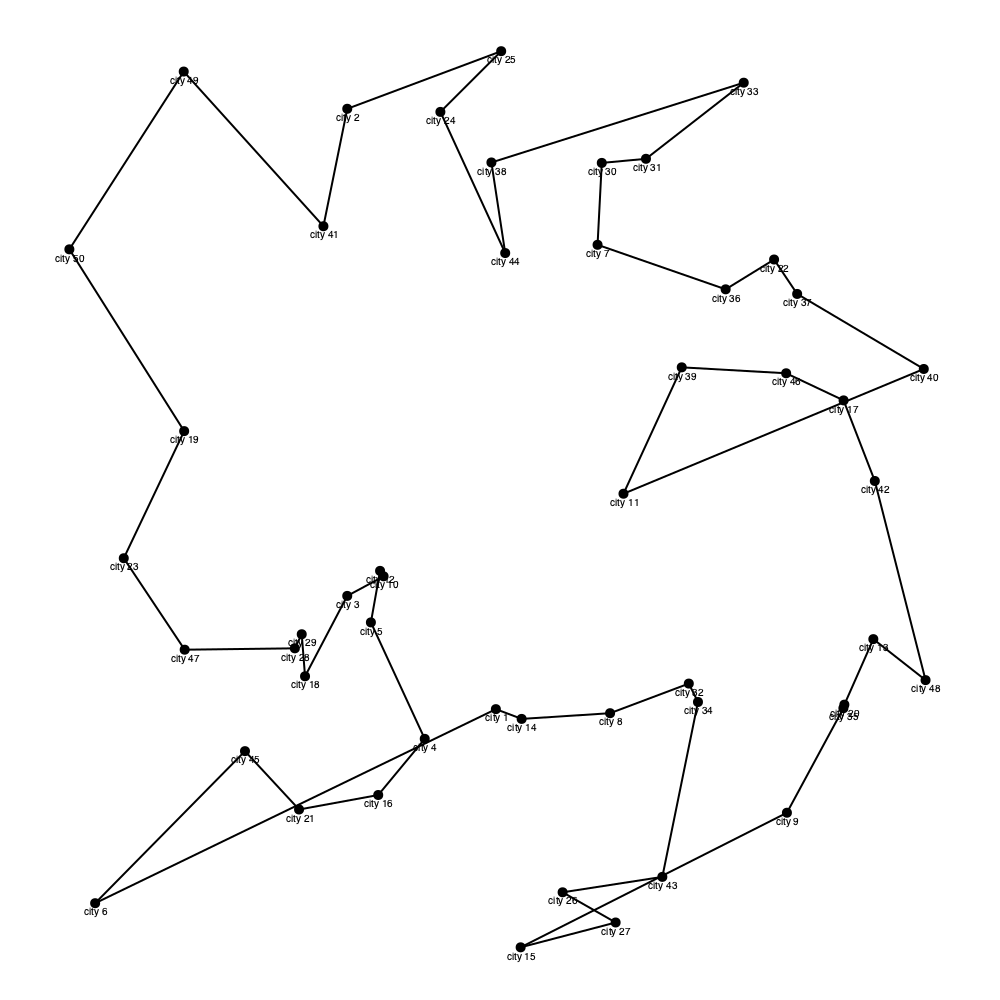

In [25]:
# Pkg.build("Cairo")
# Pkg.add("Luxor")
using Luxor
# draw tsp tour
function draw_tsp(x,o,n,size=1000,radius=5)
    Drawing(size, size, "TSP.png")
    stretch=Int64(0.9size)
    origin(Int64(0.05size),Int64(0.05size))
    # draw cities
    for i in 1:n
        A=Point(stretch*x[1,i],stretch*x[2,i])
        circle(A, radius, :fill)
        label("city $i", :S, A)
    end
    # connect cities by edges
    for i in 1:n-1
        A=Point(stretch*x[1,o[i]],stretch*x[2,o[i]])
        B=Point(stretch*x[1,o[i+1]],stretch*x[2,o[i+1]])
        line(A, B, :stroke)
    end
    # return to first city
    A=Point(stretch*x[1,o[n]],stretch*x[2,o[n]])
    B=Point(stretch*x[1,o[1]],stretch*x[2,o[1]])
    line(A, B, :stroke)
    finish()
    preview()
end
draw_tsp(x,aco,n)

In [15]:
array = [1 2 3 4 5 6 7 8 9 10 11 12]
array = reshape(array, 3, 4)
array = array * 0.8

3×4 Array{Float64,2}:
 0.8  3.2  5.6  8.0
 1.6  4.0  6.4  8.8
 2.4  4.8  7.2  9.6